In [2]:
from random import shuffle
import glob
import tensorflow as tf
from sklearn.externals import joblib
import numpy as np
from sklearn import preprocessing
import uuid
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation
import sys
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import cv2
import keras

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras import backend as K
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, Dropout
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation

import keras

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K

C:\Users\Mihail\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mihail\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mihail\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mihail\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [3]:
img_parts = r'C:\Users\Mihail\capcha_letters_1*.jpg'

In [4]:
augmented_path = r'C:\Users\Mihail\augmented'

In [5]:
dir_parts = r'C:\Users\Mihail\capcha_letters_1'
onlyfiles = [f for f in listdir(dir_parts) if isfile(join(dir_parts, f))]

In [5]:
def train_preprocess(image):   

    new = random_rotation(
        image,
        15,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    new=random_shift(
        new,
        0.2,
        0.2,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    # Other transformations...
    return new

In [6]:
file_name=onlyfiles[0]

image = cv2.imread(os.path.join(dir_parts,file_name))

In [7]:
image.shape

(23, 13, 3)

In [10]:
j

In [9]:
j = 0
for file_name in onlyfiles:

    image = cv2.imread(os.path.join(dir_parts,file_name))
    
    print(file_name)

    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #image = cv2.resize(image, (40, 40))

    plt.imsave(os.path.join(augmented_path, file_name), image , cmap = plt.cm.gray)

    image = image.reshape([image.shape[0], image.shape[1],1])

    for i in np.arange(150):
        new = train_preprocess(image)
        new = new.reshape([new.shape[0], new.shape[1]])
        if j % 4 == 0:
            plt.imsave(os.path.join(r'C:\Users\Mihail\test_im','{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)
        else:
             plt.imsave(os.path.join(r'C:\Users\Mihail\train_im','{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)
    j += 1   

t_1_0a11c7a5-1027-4a2d-8949-f1b25ca8012f.jpg
t_1_110d74dd-cdce-4c4c-a318-e7446ed69439.jpg
t_1_1415aff7-39cf-481a-a66e-ff9a6b88e272.jpg
t_1_14579eba-a07d-405b-b285-ceca5318a443.jpg
t_1_2496259e-31c6-4dec-b81e-9bc830f3f0ea.jpg
t_1_251581a6-06ef-4c1d-92a5-c5718ae7dfe6.jpg
t_1_2b5ba0b8-db27-4e31-adea-dfdda2f886b1.jpg
t_1_3463ef4d-d34a-46e3-8152-4fe8ae0595e6.jpg
t_1_36b55c77-8972-4b01-9333-26d1d2f2c98f.jpg
t_1_3847e317-20b3-40f0-8832-dc8254cd80b8.jpg
t_1_4b6ec6c8-9837-416d-a265-17f537003b0d.jpg
t_1_4c7dd9f6-fa76-4b08-8c62-78fed80d1dc5.jpg
t_1_4fc32351-6d55-485a-a34f-662556ef31f3.jpg
t_1_51c0a4c5-ac97-4b61-80bf-dd594d7321de.jpg
t_1_553b869e-95f0-44e0-aaed-7bf470468e55.jpg
t_1_5998a597-751d-44d4-bd8f-32da651c3ffb.jpg
t_1_61eb1781-ff16-4d9b-8a1c-f47c6db2c448.jpg
t_1_66d5b957-9e30-4335-aa7d-d87b45e6e43c.jpg
t_1_6a93e10d-e696-4a48-8d84-51ad948cc5cb.jpg
t_1_6c18888f-9974-4872-8c28-ba3a7193fd0c.jpg
t_1_78d8d30d-f303-4a98-81f2-6a6d06bae107.jpg
t_1_7de04f06-a994-4a6c-8cdb-f39c4799e3f9.jpg
t_1_89b752

t_4_9c46277c-c7bb-42d2-b7e4-ece91e071f27.jpg
t_4_9d239629-8fa4-4377-b9f2-09720e847a36.jpg
t_4_9eabd6b3-ac48-4d9f-88c9-c6858f5bdb06.jpg
t_4_9ef35427-b755-40f6-b36e-7d49b3d0024b.jpg
t_4_a218356c-1c44-4c44-8657-e74739786920.jpg
t_4_a4306e90-2035-4846-9767-eccecb6d890a.jpg
t_4_a491568f-f437-4ddf-bef7-705caeda86bc.jpg
t_4_ad874812-8390-4ee4-b57a-cdb09dac222d.jpg
t_4_ae575bb7-44c0-472d-abcd-4eeb213e1af2.jpg
t_4_af2dc409-25b2-4192-ae8d-3a64058ccd9e.jpg
t_4_b7e2af18-2e49-4b84-a26f-bdf7e9666a0c.jpg
t_4_be9626b5-31ef-432f-97b7-c083d0b18804.jpg
t_4_c2ec6c95-5863-4871-af68-d40e54b43e89.jpg
t_4_d277ae33-2730-47f4-9158-168854b19280.jpg
t_4_dc30ebe3-e8e7-4075-b9f4-0b27034bc330.jpg
t_4_dea357cb-3bce-4f03-92dd-690b03bc8b83.jpg
t_4_e01f4518-e1dc-42b9-9c7c-ff4551caac86.jpg
t_4_e5f8bf09-e91f-41ac-b98b-bcaa1c75726d.jpg
t_4_e7200610-5c24-4265-906b-8484a227619a.jpg
t_4_e76aea8c-4046-494a-813e-3a6fdaece818.jpg
t_4_ea7a519e-db19-4b2b-9ac5-d013436480c8.jpg
t_4_eab891a4-bcbf-4ee5-a9a6-d2a2ff46fe2f.jpg
t_4_ecf542

t_7_d8b186d7-16ee-4057-beb5-0915ddb265d4.jpg
t_7_e6199ac3-d9d2-4edb-9fc4-4413e7b064ce.jpg
t_7_e864436f-ae1b-467c-a85c-f5c25047dc85.jpg
t_7_ed1bf688-02b2-4317-a8c2-526e83318555.jpg
t_7_f298262e-f950-4ffa-a3ba-61876eb778d3.jpg
t_7_f50d62a8-28de-41ba-adf1-670288b731f3.jpg
t_7_f551459e-46e0-4ffa-88ea-fb1a85c9339e.jpg
t_7_fb774e96-dfb3-41e6-89d0-db4b83042ebd.jpg
t_8_01e85555-cc04-4d3e-8405-8789e1d5c279.jpg
t_8_0689a0ed-6344-47c2-a627-8d743e8a0959.jpg
t_8_078c74da-c20b-46bb-8f77-2bdfdd3f2f11.jpg
t_8_07a595c0-639e-4f53-a5de-6a6854dbb3e0.jpg
t_8_0e23d82f-32d5-4373-a488-665ff0189c6d.jpg
t_8_14dde2b8-d92e-44c4-ba95-1d948dcaa383.jpg
t_8_15777dbb-666d-4842-9078-e2bfbc7fc0db.jpg
t_8_1dca7c4a-c9bd-4d5d-998c-85e37ec44ba6.jpg
t_8_2286d8cf-a548-4176-b704-0dda6d9ce223.jpg
t_8_2a5055fc-be4b-4e6c-9248-65a6d0afef28.jpg
t_8_2eb319ab-8cd0-43fa-8e4b-c1fa8d08927d.jpg
t_8_31b5bbac-8fd2-481c-b3e6-eb4e0afe1165.jpg
t_8_3624fe7a-fa66-4bbf-bd29-348f8bbc407f.jpg
t_8_37cfef23-b9b1-4073-aae1-2384abd67bb9.jpg
t_8_42b285

t_a_d11908a7-fb66-44ae-aed4-ff5e20d4a74a.jpg
t_A_d4e33831-282e-4327-99e9-ea98cbf9e35a.jpg
t_A_d88bb511-c3ea-457f-982f-7960d94e6faf.jpg
t_a_d912eb3e-6b09-4788-97cd-70c6f7dca006.jpg
t_A_d914714f-2908-4002-b570-9138ad554b95.jpg
t_A_dab563e8-7d5f-498e-9b5d-d65117f42ee4.jpg
t_A_dc95ec51-3d70-476f-a364-fe911d60334f.jpg
t_A_dffba125-0cb5-4295-b818-91c9600d4205.jpg
t_A_e05071fe-89b7-4181-ab54-615efeea14a8.jpg
t_a_e1abb3eb-a987-4fe4-8eea-229ee19aa140.jpg
t_A_e43b406b-0475-4892-8db3-994d5eabbf11.jpg
t_A_ea95b7aa-628a-498a-90d3-424862f1cd02.jpg
t_a_ef47f404-0c9a-4e2c-a328-9f713573a0b5.jpg
t_a_f01b9b0c-ffa2-4f02-9181-4c234bee70ec.jpg
t_A_f1c4acc4-0396-4c5f-93d7-569f48b43aa0.jpg
t_a_f36cecee-906f-4373-b680-90d3e54e8135.jpg
t_a_f49b32e3-d08b-4677-a5d5-33525b8f7724.jpg
t_A_f53199a7-4e2e-4c93-93ec-7d55a00b5fac.jpg
t_a_f5e285c1-f105-4403-9894-4d0241f6b315.jpg
t_A_f6c1b7ea-3368-49cf-9147-99a607b677b7.jpg
t_a_f88d6144-9121-4db6-870a-9126bf1561b1.jpg
t_A_f939cc1e-ec55-4c0e-b176-f11666fb1823.jpg
t_a_fa095e

t_C_639c3143-c70c-47dc-841f-e3d75d04344e.jpg
t_c_663447b3-71f8-4df1-af91-a34f313cc99d.jpg
t_c_6653ca6e-c176-477e-981f-51611acf8f0a.jpg
t_c_66e39ed9-7f2f-4f20-8581-f36a3c01c712.jpg
t_c_68c1927e-57a6-4bc1-9860-c3ad4ffa4a51.jpg
t_C_69781417-f700-4483-8a71-815c1cd705aa.jpg
t_C_717e4dcb-0702-4e31-adc9-f84b75ac2630.jpg
t_C_718feffb-766e-4c09-8c4c-3f989896a18c.jpg
t_c_71921250-1ce5-4ad0-b7fe-d0335d313526.jpg
t_c_780b5b05-8fbe-4172-92cb-847bc6a814fc.jpg
t_c_85cea853-76fc-4d3e-a6de-db6ab8028e41.jpg
t_c_86363811-b619-4c5c-97ca-87671dbb8201.jpg
t_C_88792a3e-0dcf-4736-ac2a-0be219dfd407.jpg
t_c_8940963f-8801-44ad-bccc-d62adfea061f.jpg
t_c_89599357-40ca-44d7-9957-73177b5dcfcb.jpg
t_C_8bc5385e-ef24-4941-9a03-59c3775d11e2.jpg
t_C_8ea691bb-fb0e-404d-b81d-f643ffe16f6d.jpg
t_c_8ef24c53-af20-4271-804e-a3f6bab179ad.jpg
t_C_90a4706a-4b17-4a20-be1a-a9c7e45c2227.jpg
t_C_93102290-b527-4b5c-a4c9-9cb24650558f.jpg
t_c_95833915-235d-4a51-b7cb-7c1a026e0b88.jpg
t_c_9584fdbf-90ba-4532-b893-64dc76c9a857.jpg
t_C_9d14c1

t_e_2b295959-6946-4a2a-b55d-33af43d62e3a.jpg
t_E_2b37761a-51eb-4601-b0f0-552e82beb48b.jpg
t_E_3830f6e5-6b32-48e8-b560-c05318e6a86a.jpg
t_E_3cdf148e-ac2a-4e91-bf32-807617798103.jpg
t_e_3d8725ea-c5de-4281-8bad-65bdc662b500.jpg
t_e_45381970-09e2-41c0-8f3c-791f3c4c9ffa.jpg
t_e_48d54e8e-14da-4053-a81e-bc34ee84e4ac.jpg
t_e_4b2c65cb-ab06-43a7-b281-f64074cdcd65.jpg
t_e_4e38b522-f618-4769-b509-4a3f52670d8c.jpg
t_e_510045a8-7480-496d-9d64-2cf8377ff05c.jpg
t_e_516b9949-8d50-4f61-895e-a1497d6f7e56.jpg
t_E_517b44ff-af84-4a64-a427-177fd5d923a0.jpg
t_e_5bc5261e-60c1-4309-b8db-0c64354f4ed9.jpg
t_e_5dd4c7e6-68d7-42d5-b34d-a0d22b52b956.jpg
t_e_5f63587a-cf71-4794-a51c-e25be8f97c6b.jpg
t_E_608443cc-dcc8-4172-8fef-88fc4c8eeb9a.jpg
t_E_62098e1c-4634-4efc-9d33-1cac5d2b84da.jpg
t_e_62525bee-579e-4a07-9d4b-0680e4529b32.jpg
t_e_63356617-9e75-4928-8350-d6f653197deb.jpg
t_e_6431cbc4-7c9d-4743-bb4b-38120e8d7e97.jpg
t_e_6460c63d-460b-4bbe-a291-90ae8e4b02b1.jpg
t_E_6f5295c8-b527-4266-9e9e-70e745eb960c.jpg
t_E_6f80d8

t_F_da0be2e7-67e4-4a09-93cb-602dc0156548.jpg
t_f_dacb221e-ded0-42f9-919f-d8a482eef2b3.jpg
t_f_dc5624b8-ef81-478f-88ee-5e657cd7bba5.jpg
t_f_ded45275-acc8-46f5-947d-82d2faf161fa.jpg
t_F_df2cbeec-3b24-4180-800d-b3b8141f207e.jpg
t_F_e1417f23-60a9-4073-b2b7-006a2488c7d0.jpg
t_f_e38054af-80f3-4782-a986-0e21d335adb4.jpg
t_f_e4bb0ca3-9c40-44ac-b715-67e10e60b1b3.jpg
t_F_eadcd6ea-dd40-4f43-a43d-c2fee8b35e98.jpg
t_f_ebe726d6-0433-46a2-919d-a3b66bc1ed10.jpg
t_F_eda06c9b-40e7-4085-ba19-eff24b7ad254.jpg
t_f_f02521da-f118-4915-88f9-1a1b8e5d8423.jpg
t_F_f0de6dc7-5817-46e3-97b8-85b461068226.jpg
t_f_f38e9987-8c2d-450b-8b13-3dc6af626dea.jpg
t_f_f3c3131b-0ddc-4527-9d0d-d64dcc4645a2.jpg
t_f_f81b5844-baa0-4d65-8e3d-55502f0fb793.jpg
t_F_f9a2b7d7-f986-4ec2-aa08-a82cb8602b73.jpg
t_F_fb22cf4e-3df3-4f9e-aa7b-1ce656be3332.jpg
t_F_fc53694c-c5ef-475c-8d6f-732447c09e40.jpg
t_g_05d2cee2-66cf-4889-8eb5-df055e2af6cb.jpg
t_g_09981f27-8387-43c8-a505-4608ae357b6b.jpg
t_g_0cdb1a6f-79e1-4334-8d81-5c96f144c195.jpg
t_G_0cfeb5

t_H_6785095f-98fb-43d7-b8b2-4a4c603aecdc.jpg
t_H_6a3bf98c-2aec-4d60-8e29-a892e3297584.jpg
t_h_6f07950f-4c1e-4730-aeb9-c7f226ffecdd.jpg
t_h_710e3d70-6c7a-494d-a7c0-32fff83ff9c8.jpg
t_H_74183cad-faf4-4da3-80c4-386a0c9c9595.jpg
t_H_77a9b55f-cf31-4ec3-ac63-13b83860bf92.jpg
t_h_7c303895-4d36-4843-981a-7dc1cf5f2455.jpg
t_H_7d0bfab1-881a-4060-ad13-ea3d66588b1e.jpg
t_h_7e0aec4e-81ad-40af-8daa-779b06f8c44b.jpg
t_h_827787c9-2e38-4e16-85f8-bb12843cdf43.jpg
t_h_82fc5f80-27e7-4792-b56f-af5cf1dc408f.jpg
t_H_83a5a61f-cc4e-4e01-b950-60cc2f6faada.jpg
t_H_857dba7c-496a-4f56-8b2a-b66a662332ed.jpg
t_h_872d0eba-d64d-403c-9737-dfa6005fa31f.jpg
t_h_8f510cb3-66fe-4021-b2d0-4ef52d12c7cb.jpg
t_h_8f8cba94-836d-4213-921e-00346ac5e555.jpg
t_H_8ffeb4aa-9977-4402-b816-a670d3f231a7.jpg
t_h_919bbd95-5fab-45fd-bae2-b4972833ced8.jpg
t_h_9492f8be-ab03-415a-994a-759eb6cd5704.jpg
t_H_95239e7d-7078-4cce-8414-206898efca8d.jpg
t_H_a04becb4-5f62-4a2c-9192-f7876ec46e6d.jpg
t_H_a06f8fc7-fdf2-4070-84b9-ac3e3b112261.jpg
t_h_a1bd54

t_j_e6d8c1fd-2f93-4691-b4d6-1fafea77380f.jpg
t_j_ec8af262-9100-4227-878c-7af56ad3201a.jpg
t_j_ee219126-57a0-440c-888d-1bfe3a22c74e.jpg
t_j_f0f587ef-9870-45c7-ac52-700d2bbef738.jpg
t_j_f1ecce3b-8dd1-4ef8-8280-0843198b6d1d.jpg
t_j_f22f22eb-b369-4f69-9ef8-ccd0518a429a.jpg
t_J_f26657cd-da2f-4641-a74d-d553ca9c4693.jpg
t_J_f6e48603-adca-4b58-9e38-1fd359a0c0fe.jpg
t_j_fd749889-5c02-4805-8d8a-ee7ccac7413b.jpg
t_K_00c74f89-be3f-4d61-83cc-45f6c2e21c54.jpg
t_K_00d11d61-aeab-4123-b1a9-976f8a45d30f.jpg
t_k_03a23cbb-b234-495d-9c42-9e7b891ca7fa.jpg
t_k_04b3b84b-c201-4adb-aa01-6e4d76f6f2cc.jpg
t_k_0a4d819e-d4b7-4714-865c-5289838065e4.jpg
t_K_0b6281eb-6142-4920-9480-43ccffbb1b14.jpg
t_K_0b7d4b1f-d6c1-4b1d-ade7-adebc974c045.jpg
t_k_0db07d7b-1ac4-41d9-a5b6-bdeadb9bfba6.jpg
t_k_0e76e53a-257b-450a-a0cf-86e3711da4ab.jpg
t_K_13a8da01-25b9-4837-9ccd-4fc250ec3d88.jpg
t_k_17b2e64a-60c3-4359-ac45-570e6d65ec6a.jpg
t_K_18258a81-0927-4852-9f97-481ca7b013fc.jpg
t_K_1bddc2d6-321f-4127-8526-3abe0ee6f4f1.jpg
t_k_1cef86

t_M_9bfd8548-2736-4ac2-b958-7769d2f8807c.jpg
t_M_9fabc9f7-bf6d-4d75-bc71-fb9c6e4d12ec.jpg
t_m_a5cd7df4-26d3-4987-a03d-38ee91fe1298.jpg
t_m_a71dd1d2-c9b5-47fd-9ea8-c4fd643cb42e.jpg
t_M_a723ae03-442d-4f53-89f6-4ae9991f3c12.jpg
t_M_aed4ce50-2113-4bec-b99b-5a3e40cf2c9f.jpg
t_m_af0f9225-f48b-4a32-8db9-c15e0f7e3742.jpg
t_M_afe262fb-1096-4041-8d00-76b792e87e25.jpg
t_m_b1412f44-a593-4ad4-8b8e-55a616afeeb0.jpg
t_M_b7c1911a-8259-4a23-880a-a4467561dab6.jpg
t_M_b830f6e4-2993-4da9-ad2b-c19f2ff63dbc.jpg
t_m_bc65f224-5819-4a85-ba10-8ad40861f4a1.jpg
t_m_c0e96f28-1006-482c-8419-c5602e86136e.jpg
t_m_c2815315-48ae-4083-9304-93e06746847b.jpg
t_M_c79b58c6-d9db-4c62-99b8-7fd4399ff9bb.jpg
t_m_c9bc0727-3190-4894-a650-f748c69a05e8.jpg
t_m_ca1d9394-dcb1-4b54-b7ea-6c2f0014b2fb.jpg
t_m_cb212a42-44e0-4154-bed7-18f72c992ab7.jpg
t_M_cc92cffb-03ac-4505-8936-53f9e273ebb9.jpg
t_m_cd848590-b372-4d45-aca6-9a7da48457c3.jpg
t_M_d1769050-79dc-4540-bf6c-334b9346675d.jpg
t_m_d2b148e9-2c88-4e95-915f-bf9da2209617.jpg
t_M_d42aa6

t_P_57804042-04ee-4cda-b821-5f166808a85e.jpg
t_p_5e82dec4-9172-4552-ac21-292598819593.jpg
t_P_602e6dc0-489f-44f5-91b1-cced34dafbd9.jpg
t_P_6190cf55-886f-495e-aac3-deffb1f3341f.jpg
t_p_61a39213-75e5-45c1-a4ec-e128ed37c5e6.jpg
t_P_62c7f696-056c-4189-a8dd-f396a5b904c2.jpg
t_p_633cb74c-2876-44ad-a7c0-060edca2d6de.jpg
t_P_63dce664-f956-4450-a7d6-1963156d540f.jpg
t_p_65513dc0-ed9c-455e-b08e-d9e64486a176.jpg
t_p_69356b9a-6789-4279-b0bc-1964228c30b5.jpg
t_p_6cfe76cf-124c-4a65-a7e7-427cc80df339.jpg
t_p_6e3a1140-6750-447b-97e3-314442b1a618.jpg
t_p_7334d56c-736d-4f5c-a978-4a293d93e256.jpg
t_p_757ee5a6-0d32-41a1-92f4-6c076147b353.jpg
t_p_75feff15-bf55-4e29-bf1c-c99a7f3ab0db.jpg
t_p_7639ba6f-6d6e-48fd-9e29-17e1f06e86a2.jpg
t_P_779122cd-4001-45f7-a2a3-10c827864555.jpg
t_p_77f36615-3e57-425a-8f78-4a7324d571ba.jpg
t_P_7859c3e9-7b43-423c-b921-f98a9aac3bd5.jpg
t_P_7a793b59-1e0a-4ca7-b6f6-9a86b8a2283f.jpg
t_P_80250918-9843-4292-9fd5-c456e339a4d1.jpg
t_p_868b35ae-e08d-408f-8453-4fc5c0b19872.jpg
t_p_88d222

t_R_3bb25bdb-6f11-409d-af4e-3d242efbead8.jpg
t_R_4901e934-4ff3-42d6-873d-7500c47afada.jpg
t_r_495b0e0b-1de2-41f7-bbbb-28d647b463c7.jpg
t_R_4f4db10f-e95e-4337-a6ab-7ee049560e8a.jpg
t_R_5064d823-04a9-4ced-ab09-6e8847205482.jpg
t_R_52ea2af1-4df5-40f6-869c-21daa004095b.jpg
t_R_553165f2-5051-4403-adf5-a0994d24a875.jpg
t_R_58fd5277-cf2e-4ba3-a0df-e76fcef648b0.jpg
t_r_59b37a38-e525-4562-a82d-3857ac51f330.jpg
t_r_59ef49dc-1a88-4a48-907b-595fccedfd27.jpg
t_r_5b4a7077-4a81-4619-aa9a-81ec16a20158.jpg
t_r_5d112706-d39f-49b2-a8db-9398cbbf0e97.jpg
t_r_5e4916b5-3e06-476c-a17e-04d66372685c.jpg
t_r_64d07617-7c68-4e73-8c43-ead958aea50d.jpg
t_R_6555c9a5-47f0-4dc3-a866-834e2da74eb4.jpg
t_R_674dda97-71ab-4a52-a84a-f48c4261d381.jpg
t_r_697c3d93-ce85-4f48-895b-19b6773f5d3b.jpg
t_r_6a82b382-9ce0-425c-91ee-10ad74150b83.jpg
t_r_6bd628bd-ffda-4b57-9b41-2fcdedef1e46.jpg
t_r_6de5ee1d-78ec-413d-a8f1-d4d25bf00557.jpg
t_R_77e1d1e7-ad90-441d-87d2-d15e142becea.jpg
t_r_78d2039a-6f2d-4ef8-9e94-de1ec4a9528e.jpg
t_R_7f08fa

t_s_dcd50d36-e139-4dc7-a2f9-ff3c57609819.jpg
t_S_ded2b675-2925-4851-8701-a5e92dd262c1.jpg
t_S_e3d2540c-9708-4b59-ba7a-e3767b1df8d0.jpg
t_s_e554e0f5-eff8-4e7f-bf40-6505f9b2f0d3.jpg
t_s_e7b2f8cf-eec0-4f24-9175-65e6b5c99162.jpg
t_s_e87d2ef0-6f75-4a1b-a2a4-da5c781c6ecc.jpg
t_s_ea4224ba-7a2c-475c-b49b-b1960f4f6b9e.jpg
t_s_eb8ff7dd-04e1-487b-9ad9-5cdde61a60fe.jpg
t_S_ec67e9fb-4a3d-465e-8dfd-2c20f1d05683.jpg
t_S_ee8c36bc-a3f8-49f8-ad8b-7454988abd04.jpg
t_S_f32199fa-81e5-4e2a-92b2-859296ca9305.jpg
t_s_f55a259e-c3b6-4b99-91c6-8c579a413195.jpg
t_S_f7c5a307-6cc6-409b-9168-3be70fb7fdf2.jpg
t_S_f861dbfc-7cc6-4745-9e80-3a5693777009.jpg
t_s_f9b08862-1d3a-461a-ac33-29c150060086.jpg
t_S_fa8b5484-f0ae-49d1-aedb-e01ff3ed945e.jpg
t_s_fac44076-b1ba-4fa4-9cb3-dc4d2bb281fa.jpg
t_s_fb126d59-14b0-4503-920c-31f695726d32.jpg
t_s_fdfd8486-47e9-4869-970b-9efec5fd91bf.jpg
t_s_fe28d3b7-4ce9-4176-8b63-41647bf5f69a.jpg
t_S_feda4ca6-ecbb-4216-850b-9154ea82af8e.jpg
t_T_01e06b5c-f413-4a4a-b4cc-4ff602d35eee.jpg
t_T_02fe45

t_U_66c83a2f-504b-4823-88bb-3f68a86b3d76.jpg
t_u_69d0e5fb-dab2-4f36-a419-faa4cf313131.jpg
t_u_6d427548-1101-4749-88fc-8198c43c6a45.jpg
t_u_70bd6bfb-535a-45d2-9568-81f37218b448.jpg
t_u_764acdda-36ec-4fc0-bd0a-2846f8f32c31.jpg
t_U_79525030-678c-496e-afbc-37bd06f2956e.jpg
t_u_7a536d41-769c-43c7-920e-0cde77fc905e.jpg
t_U_80bdc5a4-7129-4a81-8804-d94dd0f8c309.jpg
t_u_83e29fb5-ac43-4db0-9a76-f0a0c3ce518c.jpg
t_U_84fb1360-77d6-4dca-bcb1-ae918c15b2a3.jpg
t_U_8564e4b3-115c-4c04-a62f-ed77eb83c134.jpg
t_u_85754db0-39a8-43b4-8075-4da8d8d44077.jpg
t_u_85ccb54c-36bf-4fff-bdc8-59f2998fcdcc.jpg
t_U_86b6b038-0c98-43c7-a0d7-6802c594ba43.jpg
t_u_87839107-e9eb-4b37-b61e-22ae498311fc.jpg
t_U_8801e9d5-2a9a-445a-9f96-27cea793d01b.jpg
t_u_882d197b-92de-4078-8be4-b80314de7003.jpg
t_U_8a553073-5d8c-4b1e-91fc-5a215df1e333.jpg
t_U_8c64cbfd-8332-4843-a18c-3a21e25c984a.jpg
t_U_8d953565-b0d8-4532-907a-c30d4e974fe3.jpg
t_u_8feb8912-f561-415d-9a93-b215b2f27782.jpg
t_u_91254a9a-c8a1-447e-ac33-a64fdab30f4b.jpg
t_U_9308ee

t_w_98e197b1-ebd2-4588-bdc8-7acdf7c11476.jpg
t_W_9990ec13-16a2-4f65-9793-14f428b7cc52.jpg
t_W_9b06ce6d-ae42-4672-8c7e-29ab6c85a660.jpg
t_w_9b17af6e-46db-4a48-9b73-7d63b863c34f.jpg
t_W_9bd07f92-ebc9-43f4-82a9-9762efde7035.jpg
t_w_9d9380d2-ec63-4df7-94ef-8c5b2e7773e7.jpg
t_w_9dee7a00-4780-418e-aca8-4f14d0e2d2ea.jpg
t_w_a0b3cee0-c378-483e-9c4e-1347d1b75446.jpg
t_w_a497bd9c-7efc-42cc-99f5-f3731e10b6d6.jpg
t_w_a4d27736-342e-4a6a-a46c-41c7f249bffd.jpg
t_w_a62659da-3f52-4f76-bc59-7c47a33781ce.jpg
t_w_a6b47a04-f4bf-4da8-971a-bf8d6ba06f61.jpg
t_w_a8423801-dc77-40ed-89c7-4130bb722425.jpg
t_W_abd785c3-22a5-4964-a0c4-e8f0a6918f34.jpg
t_w_acbc50bb-89a8-4be2-9cf4-3283d5c4d14d.jpg
t_W_aedc839c-d69f-4ad2-867f-a6cd34d59ba0.jpg
t_w_b3f5a12d-da9c-4aad-b7b8-b499b8b12d56.jpg
t_w_b4957922-736a-42b8-b328-127af8d7f105.jpg
t_w_b70372ca-be7d-4353-98f7-15371d936840.jpg
t_W_b78b29a9-39e5-4d04-9769-d67deae6a1d3.jpg
t_w_b79776b1-93e8-4291-849d-5c24abaa1498.jpg
t_w_bc9ebe4a-298a-42e9-bc99-84886c9dc71b.jpg
t_W_c003a5

t_y_63f5a263-d54c-44e3-8e4f-a57f8acd0b35.jpg
t_Y_6773996e-0d58-4d16-a154-412c13a27d7d.jpg
t_y_69cbd046-da76-4ca3-bf2e-3c767062fc10.jpg
t_Y_6d25f3dd-893d-4960-a7b7-95ce648797f7.jpg
t_y_6f2c78b1-3b21-4fda-853d-74dd3b860aa0.jpg
t_Y_6f5f66bd-304e-47ad-b1ce-215999eea23b.jpg
t_y_70e1cbf1-0f5b-4c5a-bbc2-2b839f792aca.jpg
t_Y_79f7af2d-0015-4cbe-93f5-f587c1b457b4.jpg
t_y_7e566f98-ea33-48e0-b49d-8751e35909fa.jpg
t_y_7e667d0c-05a7-47bd-984d-21a748479842.jpg
t_Y_7e8a5287-3c5e-4e3e-8e29-a56f4cd60beb.jpg
t_Y_8028559d-30fc-40a1-b19e-dfc4411c2308.jpg
t_y_830588db-833c-4e59-affc-b68928c06548.jpg
t_y_83149a85-b038-4f28-afe4-cb974d6c7020.jpg
t_Y_83c5e6dc-1b71-450d-b286-c9a9038ea2f6.jpg
t_y_8704b014-7946-4156-adf1-7fd1ac7e93bb.jpg
t_y_874bd435-d1c9-46e1-9f88-0f4ae57f249f.jpg
t_Y_88532479-fa6e-4dad-bd82-39de55220d0f.jpg
t_Y_8c0cdfd3-20b5-48cb-98e5-75967d7417b9.jpg
t_y_8eed69b1-c9f1-4bb9-a6b3-d9784e3a254c.jpg
t_y_8f0da474-d622-4409-b83c-f59cb8cdefa8.jpg
t_y_924c477c-2a11-4904-a5be-2126a39930e4.jpg
t_Y_942bbe

t_Z_efe7ffbc-2e35-4851-a97a-6dc0d01f8fe3.jpg
t_z_f05a827e-61dd-4a0a-94bf-6ac5017046f3.jpg
t_z_f66f0690-1436-486f-af82-0748aaa25d96.jpg
t_Z_f7b9888d-2a80-44b2-89bf-2aeb7abdcb3e.jpg
t_Z_f943fd40-042b-43df-8eef-4c9c837bb9b2.jpg
t_z_ff634f38-17a4-4ff8-bbf1-877812f03f9d.jpg


In [8]:
addrs = glob.glob(dir_parts)

In [9]:
onlyfiles_train = [f for f in listdir(r'C:\Users\Mihail\train_im') if isfile(join(r'C:\Users\Mihail\train_im', f))]
onlyfiles_test = [f for f in listdir(r'C:\Users\Mihail\test_im') if isfile(join(r'C:\Users\Mihail\test_im', f))]

In [11]:
labels_basic = [addr.split("\\")[-1][2:3] for addr in onlyfiles]

In [14]:
train_labels_basic = [addr.split("\\")[-1][2:3] for addr in onlyfiles_train]
test_labels_basic = [addr.split("\\")[-1][2:3] for addr in onlyfiles_test]

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
le.fit(labels_basic)

LabelEncoder()

In [15]:
_ = joblib.dump(le, 'labelencoder.joblib', compress=9)

In [10]:
le = joblib.load(r'C:\Users\Mihail\labelencoder.joblib')

In [11]:
le.classes_

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'J', 'K', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'j', 'k', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z'], dtype='<U1')

In [15]:
train_labels = le.transform(train_labels_basic)
test_labels = le.transform(test_labels_basic)

In [16]:
train_addrs = r'C:\Users\Mihail\train_im'
test_addrs = r'C:\Users\Mihail\test_im'

In [17]:
from absl import app as absl_app 

In [18]:
w,h=40,40

In [19]:
def load_image(addr):
    # read an image and resize to (224, 224)
    # cv2 load images as BGR, convert it to RGB
    img = cv2.imread(addr)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (w, h), interpolation=cv2.INTER_CUBIC)
    img = img.astype(np.float32)
    return img

In [20]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [25]:
train_filename = r'C:\Users\Mihail\tfrecords\train_1.tfrecords' # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)

j=1
for i in range(len(onlyfiles_train)):
    # print how many images are saved every 1000 images
    if not i % 100000:
        print('Train data: {}/{}'.format(i, len(onlyfiles_train)))
        writer.close()
        train_filename = r'C:\Users\Mihail\tfrecords\train_{}.tfrecords'.format(j)  # address to save the TFRecords file
        # open the TFRecords file
        writer = tf.python_io.TFRecordWriter(train_filename)
        j=j+1
        sys.stdout.flush()
    # Load the image
    
    if not i % 10000:
        print(i)
    img = load_image(r'C:\Users\Mihail\train_im' + '\\' + onlyfiles_train[i])
    label = train_labels[i]
    # Create a feature
    feature = {'label': _int64_feature(label),
               'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/330000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Train data: 100000/330000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
Train data: 200000/330000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
Train data: 300000/330000
300000
310000
320000


In [26]:
train_filename = r'C:\Users\Mihail\tfrecords\test_1.tfrecords' # address to save the TFRecords file
# open the TFRecords file
writer = tf.python_io.TFRecordWriter(train_filename)

j=1
for i in range(len(onlyfiles_test)):
    # print how many images are saved every 1000 images
    if not i % 100000:
        print('Train data: {}/{}'.format(i, len(onlyfiles_test)))
        writer.close()
        train_filename = r'C:\Users\Mihail\tfrecords\test_{}.tfrecords'.format(j)  # address to save the TFRecords file
        # open the TFRecords file
        writer = tf.python_io.TFRecordWriter(train_filename)
        j=j+1
        sys.stdout.flush()
    # Load the image
    
    if not i % 10000:
        print(i)
    img = load_image(r'C:\Users\Mihail\test_im' + '\\' + onlyfiles_test[i])
    label = test_labels[i]
    # Create a feature
    feature = {'label': _int64_feature(label),
               'image': _bytes_feature(tf.compat.as_bytes(img.tostring()))}
    # Create an example protocol buffer
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    
    # Serialize to string and write on the file
    writer.write(example.SerializeToString())
    
writer.close()
sys.stdout.flush()

Train data: 0/110100
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
Train data: 100000/110100
100000
110000


In [21]:
def _parse_function(proto):
    # define your tfrecord again. Remember that you saved your image as a string.
    keys_to_features = {'image': tf.FixedLenFeature([], tf.string),
                        'label': tf.FixedLenFeature([], tf.int64)}
    
    # Load one example
    parsed_features = tf.parse_single_example(proto, keys_to_features)
    
    # Turn your saved image string into an array
    parsed_features['image'] = tf.decode_raw(parsed_features['image'], tf.float32)
    
    parsed_features['image'] = tf.reshape(parsed_features['image'], [-1, h, w, 1])
    parsed_features['label'] = tf.cast(parsed_features['label'],  tf.int64)
    
    return parsed_features['image'], parsed_features['label']

In [22]:
NUM_CLASSES = len(le.classes_)
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=128
STEPS_PER_EPOCH= SUM_OF_ALL_DATASAMPLES / BATCHSIZE

def create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=20000):
    
    # This works with arrays as well
    dataset = tf.data.TFRecordDataset(filepath)
    
    # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
    dataset = dataset.map(_parse_function, num_parallel_calls=4)
    
    # This dataset will go on forever
    dataset = dataset.repeat()
    
    # Set the number of datapoints you want to load and shuffle 
    dataset = dataset.shuffle(SHUFFLE_BUFFER)
    
    # Set the batchsize
    dataset = dataset.batch(BATCH_SIZE)
    
    # Create an iterator
    iterator = dataset.make_one_shot_iterator()
    
    # Create your tf representation of the iterator
    image, label = iterator.get_next()

    # Bring your picture back in shape
    
    image = tf.reshape(image, [-1, 40, 40, 1])

    # Create a one hot array for your labels
    label = tf.one_hot(label, NUM_CLASSES)
    
    return image, label

In [23]:
class EvaluateInputTensor(Callback):

    def __init__(self, model, steps, metrics_prefix='val', verbose=1):
        # parameter of callbacks passed during initialization
        # pass evalation mode directly
        super(EvaluateInputTensor, self).__init__()
        self.val_model = model
        self.num_steps = steps
        self.verbose = verbose
        self.metrics_prefix = metrics_prefix

    def on_epoch_end(self, epoch, logs={}):
        self.val_model.set_weights(self.model.get_weights())
        results = self.val_model.evaluate(None, None, steps=int(self.num_steps),
                                          verbose=self.verbose)
        metrics_str = '\n'
        for result, name in zip(results, self.val_model.metrics_names):
            metric_name = self.metrics_prefix + '_' + name
            logs[metric_name] = result
            if self.verbose > 0:
                metrics_str = metrics_str + metric_name + ': ' + str(result) + ' '

        if self.verbose > 0:
            print(metrics_str)

In [36]:
def cnn_layers(x_train_input):
    x = layers.batch_normalization(3)(x_train_input)
    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(x)
    x = layers.batch_normalization(32)(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.batch_normalization(64)(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.batch_normalization(512)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(264, activation='relu')(x)
    x = layers.batch_normalization(264)(x)
    x = layers.Dropout(0.5)(x)
    
    x_train_out = layers.Dense(NUM_CLASSES,
                               activation='softmax',
                               name='x_train_out')(x)
    return x_train_out

In [25]:
epochs = 45
capacity = 10000
min_after_dequeue = 3000
enqueue_many = True
NUM_CLASSES = len(le.classes_)
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=128
STEPS_PER_EPOCH= SUM_OF_ALL_DATASAMPLES / BATCHSIZE
w, h = 40,40


In [32]:
with tf.device('/gpu:0'):
    K.clear_session()
    config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 5} ) 
    sess = tf.Session(config=config) 
    K.set_session(sess)
    #Get your datatensors
    filepath=[r'C:\Users\Mihail\tfrecords\train_1.tfrecords']
    image, label = create_dataset(filepath)

    model_input = layers.Input(tensor=image)
    model_output = cnn_layers(model_input)
    train_model = keras.models.Model(inputs=model_input, outputs=model_output)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    #Compile your model
    train_model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'],
                       target_tensors=[label])


    filepath_test=[r'C:\Users\Mihail\tfrecords\test_1.tfrecords']
    #Get your datatensors
    image_test, label_test = create_dataset(filepath_test)

    model_input_test = layers.Input(tensor=image_test)
    model_output_test = cnn_layers(model_input_test)
    test_model = keras.models.Model(inputs=model_input_test, outputs=model_output_test)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'],
                        target_tensors=[label_test])


   #Train the model
    train_model.fit(epochs=epochs,
                    steps_per_epoch=100, callbacks=[EvaluateInputTensor(test_model, steps=100),
                                                   TensorBoard(
                            log_dir=os.path.join(r'C:\Users\Mihail\tfrecords\logs','tb_'.format(0))
                                                        , histogram_freq=0
                                                        , batch_size=32, write_graph=False
                                                        , write_grads=False, write_images=False
                                                       , embeddings_freq=0, embeddings_layer_names=None
                                                        , embeddings_metadata=None, embeddings_data=None)
                                                   
                                                   
                                                   ])

    train_model.save_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')



W0805 12:04:48.287606 12040 deprecation_wrapper.py:119] From C:\Users\Mihail\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0805 12:04:48.290598 12040 deprecation_wrapper.py:119] From C:\Users\Mihail\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 12:04:48.320517 12040 deprecation_wrapper.py:119] From C:\Users\Mihail\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 12:04:48.429228 12040 deprecation.py:323] From <ipython-input-28-794279eafd7c>:24: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `

Epoch 1/45
100/100 [==============================] - 3s 34ms/step

val_loss: 14.886575384140015 val_acc: 0.07640625 
Epoch 2/45
100/100 [==============================] - 3s 30ms/step

val_loss: 15.453227519989014 val_acc: 0.04125 
Epoch 3/45
100/100 [==============================] - 3s 32ms/step

val_loss: 15.745368070602417 val_acc: 0.023125 
Epoch 4/45
100/100 [==============================] - 3s 29ms/step

val_loss: 15.958177299499512 val_acc: 0.009921875 
Epoch 5/45
100/100 [==============================] - 3s 30ms/step

val_loss: 16.01987934112549 val_acc: 0.00609375 
Epoch 6/45
100/100 [==============================] - 3s 31ms/step

val_loss: 16.063952312469482 val_acc: 0.003359375 
Epoch 7/45
100/100 [==============================] - 3s 29ms/step

val_loss: 15.333600807189942 val_acc: 0.048671875 
Epoch 8/45
100/100 [==============================] - 3s 32ms/step

val_loss: 15.224048194885254 val_acc: 0.05546875 
Epoch 9/45
100/100 [==============================] - 3s 31

KeyboardInterrupt: 

In [33]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(image,depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(tensor=image)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [34]:
epochs = 45
capacity = 10000
min_after_dequeue = 3000
enqueue_many = True
NUM_CLASSES = len(le.classes_)
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=1600
STEPS_PER_EPOCH= 200
w, h = 40,40

In [37]:
with tf.device('/gpu:0'):
    K.clear_session()
    config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 5} ) 
    sess = tf.Session(config=config) 
    K.set_session(sess)
    #Get your datatensors
    def create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=50000):
    
        # This works with arrays as well
        dataset = tf.data.TFRecordDataset(filepath)

        # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
        dataset = dataset.map(_parse_function, num_parallel_calls=4)

        # This dataset will go on forever
        dataset = dataset.repeat().shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)


        # Create an iterator
        iterator = dataset.make_one_shot_iterator()

        # Create your tf representation of the iterator
        image, label = iterator.get_next()

        # Bring your picture back in shape

        image = tf.reshape(image, [-1, 40, 40, 1])

        # Create a one hot array for your labels
        label = tf.one_hot(label, NUM_CLASSES)

        return image, label
    
    def lr_schedule(epoch):

        lr = 1e-3
        if epoch > 30:
            lr *= 0.5e-3
        elif epoch > 22:
            lr *= 1e-3
        elif epoch > 15:
            lr *= 1e-2
        elif epoch > 8:
            lr *= 1e-1
        print('Learning rate: ', lr)
        return lr

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                   cooldown=0,
                                   patience=5,
                                   min_lr=0.5e-6)

    filepath=[r'C:\Users\Mihail\tfrecords\train_1.tfrecords',r'C:\Users\Mihail\tfrecords\train_2.tfrecords',
              r'C:\Users\Mihail\tfrecords\train_3.tfrecords',r'C:\Users\Mihail\tfrecords\train_4.tfrecords']
    image, label = create_dataset(filepath)

 
    train_model = resnet_v1(image, 20, num_classes=NUM_CLASSES)


    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    #Compile your model
    train_model.compile(optimizer=Adam(lr=lr_schedule(0)),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'],
                       target_tensors=[label])


    filepath_test=[r'C:\Users\Mihail\tfrecords\test_1.tfrecords']
    #Get your datatensors
    image_test, label_test = create_dataset(filepath_test)

        

    test_model = resnet_v1(image_test,20, num_classes=NUM_CLASSES)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'],
                        target_tensors=[label_test])


   #Train the model
    train_model.fit(epochs=epochs,
                    steps_per_epoch=STEPS_PER_EPOCH, callbacks=[EvaluateInputTensor(test_model, steps=200),
                                                   TensorBoard(
                            log_dir=os.path.join(r'C:\Users\Mihail\tfrecords\logs','tb_'.format(0))
                                                        , histogram_freq=0
                                                        , batch_size=BATCHSIZE, write_graph=False
                                                        , write_grads=False, write_images=False
                                                       , embeddings_freq=0, embeddings_layer_names=None
                                                        , embeddings_metadata=None, embeddings_data=None),
                                                    lr_scheduler
                                                    ,lr_reducer
                                                   ])

    train_model.save_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')

Learning rate:  0.001
Epoch 1/45
Learning rate:  0.001
200/200 [==============================] - 11s 57ms/step

val_loss: 9.825128457546235 val_acc: 0.223125 
Epoch 2/45
Learning rate:  0.001
200/200 [==============================] - 9s 44ms/step

val_loss: 8.249923090934754 val_acc: 0.2550390625 
Epoch 3/45
Learning rate:  0.001
200/200 [==============================] - 9s 43ms/step

val_loss: 6.879993798732758 val_acc: 0.3477734375 
Epoch 4/45
Learning rate:  0.001
200/200 [==============================] - 9s 44ms/step

val_loss: 4.502152342796325 val_acc: 0.58484375 
Epoch 5/45
Learning rate:  0.001
200/200 [==============================] - 9s 44ms/step

val_loss: 4.161321891546249 val_acc: 0.5424609375 
Epoch 6/45
Learning rate:  0.001
200/200 [==============================] - 9s 46ms/step

val_loss: 6.422197320461273 val_acc: 0.465625 
Epoch 7/45
Learning rate:  0.001
200/200 [==============================] - 9s 46ms/step

val_loss: 5.096201814413071 val_acc: 0.44171875 
Ep

200/200 [==============================] - 9s 47ms/step

val_loss: 0.36468569815158847 val_acc: 0.9520703125 
Epoch 37/45
Learning rate:  5e-07
200/200 [==============================] - 9s 47ms/step

val_loss: 0.40266244947910307 val_acc: 0.939609375 
Epoch 38/45
Learning rate:  5e-07
200/200 [==============================] - 9s 47ms/step

val_loss: 0.3923429670929909 val_acc: 0.941328125 
Epoch 39/45
Learning rate:  5e-07
200/200 [==============================] - 9s 44ms/step

val_loss: 0.42762045927345754 val_acc: 0.944296875 
Epoch 40/45
Learning rate:  5e-07
200/200 [==============================] - 9s 44ms/step

val_loss: 0.40682930685579777 val_acc: 0.9460546875 
Epoch 41/45
Learning rate:  5e-07
200/200 [==============================] - 9s 44ms/step

val_loss: 0.38042746305465697 val_acc: 0.944453125 
Epoch 42/45
Learning rate:  5e-07
200/200 [==============================] - 9s 44ms/step

val_loss: 0.38577773720026015 val_acc: 0.9464453125 
Epoch 43/45
Learning rate:  5e-

In [ ]:
Epoch 24/45: loss: 0.41 acc: 0.953125 \\  Epoch 45/45 val_loss: 0.3865938199311495 val_acc: 0.939921875
add batch_norm Epoch 24/45 val_loss: 0.4067676412314177 val_acc: 0.945703125  Epoch 45/45 val_loss: 0.3921900048851967 val_acc: 0.943671875 
        

In [30]:
train_model.save_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')

In [ ]:
#train_model.save_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')
#train_model.load_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')
#test_model.load_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')

In [28]:
import base64

In [29]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=(40,40,1))
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [30]:
train_model = resnet_v1(20, num_classes=NUM_CLASSES)

NameError: name 'Input' is not defined

In [32]:
train_model.load_weights(r'C:\Users\Mihail\tfrecords\weights\saved_wt.h5')

NameError: name 'train_model' is not defined

In [31]:
train_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

NameError: name 'train_model' is not defined

In [658]:
train_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 40, 40, 1)    0                                            
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 40, 40, 16)   160         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_39 (BatchNo (None, 40, 40, 16)   64          conv2d_43[0][0]                  
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 40, 40, 16)   0           batch_normalization_39[0][0]     
__________________________________________________________________________________________________
conv2d_44 

In [24]:
file_name=onlyfiles_test[6095]

In [30]:
img = load_image(os.path.join(r'C:\Users\Mihail\test_im',file_name))

In [916]:
#img = cv2.resize(img, (40, 40))

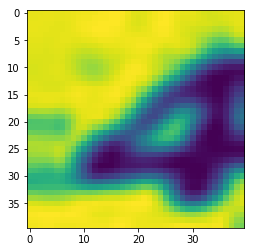

In [31]:
plt.imshow(img)

In [32]:
img

array([[246., 246., 246., ..., 244., 245., 245.],
       [246., 246., 247., ..., 244., 245., 246.],
       [247., 247., 247., ..., 242., 245., 246.],
       ...,
       [254., 254., 255., ..., 233., 223., 220.],
       [252., 252., 253., ..., 227., 214., 209.],
       [251., 251., 252., ..., 223., 208., 202.]], dtype=float32)

In [878]:
res1 = train_model.predict(img.reshape(-1,40,40,1))

In [770]:
le.inverse_transform([np.argmax(res1, axis=1)[0]])[0]

'4'

In [771]:
res1

array([[1.8591154e-05, 1.1371618e-06, 7.8034475e-08, 9.9751449e-01,
        6.5401986e-09, 1.0658722e-06, 5.7862579e-08, 2.1395423e-03,
        2.0854808e-05, 1.3131832e-05, 1.9756210e-06, 5.3306976e-10,
        4.5689484e-07, 6.8481824e-11, 3.3164859e-05, 4.9185417e-08,
        6.7475690e-07, 9.2356049e-07, 2.3986621e-07, 3.9447585e-07,
        1.6107633e-07, 6.7700779e-07, 1.8219775e-06, 1.8309026e-06,
        4.5185834e-07, 9.1165703e-10, 6.2872613e-07, 1.1126496e-06,
        1.0933184e-06, 2.2699196e-06, 5.8118989e-11, 3.3489616e-09,
        5.8548474e-05, 4.9864846e-09, 6.9286824e-07, 3.3539047e-06,
        5.2181615e-09, 1.3505741e-06, 3.9063630e-07, 3.2887941e-09,
        3.8580663e-07, 2.9268120e-08, 1.0135475e-08, 2.4584057e-07,
        3.5746606e-07, 6.5887354e-05, 4.1023909e-06, 1.9864274e-06,
        3.5926630e-06, 4.2139607e-05, 1.9873663e-07, 5.1084078e-07,
        5.9195761e-05, 8.4403187e-09, 5.8225015e-07]], dtype=float32)

In [ ]:
im_t = cv2.imread(r'C:\Users\Mihail\300 capcha screens'+'\\'+'1BAXs.png')

In [3]:
from skimage import measure
from scipy.spatial.distance import euclidean
from matplotlib.patches import Rectangle

In [8]:
im = cv2.imread(r'C:\Users\Mihail\300 capcha screens'+'\\'+'1BAXs.png')

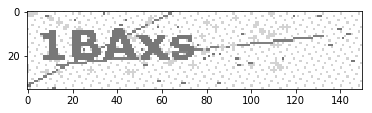

In [11]:
plt.imshow(im)

In [12]:
def get_capcha(image):
    
    thresh=2.7
    chans = cv2.split(image)[2]*7
    normilized = chans**0.3
    normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7
    binary = normilized > thresh
    
    contours = measure.find_contours(binary, 0.3)
    contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))
    
    lst=[]
    lst_countours_clean=[]
    for n, contour in enumerate(contours):
        Xmin = int(np.floor(np.min(contour[:,1])))-3
        Xmax = int(np.ceil(np.max(contour[:,1])))
        Ymin = int(np.floor(np.min(contour[:,0])))-3
        Ymax = int(np.ceil(np.max(contour[:,0])))+3
        if Xmax-Xmin>5 and Ymax-Ymin>15:
            if len(lst)==0:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)

            elif len(lst)>0:

                check=[]
                for x in lst:
                    rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                    #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                    check.append(rox)
                min_distance = np.min(np.array(check))
                if min_distance>12:
                    lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                    lst_countours_clean.append(contour)

            else:
                break
            
                
    lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])

    lst = sorted(lst, key=lambda x: x[0])

    letters = []
    for i, contour in enumerate(lst_countours_clean):

            # Get the rectangle that contains the contour
            Xmin = lst[i][0]
            Xmax = lst[i][1]
            Ymin = lst[i][2]
            Ymax = lst[i][3]
            
            min_el = np.min(normilized)
            max_el = np.max(normilized)
            alfa = 255/(max_el - min_el)
            beta = -min_el * alfa
            
            normilized = np.uint8(np.round(alfa * normilized + beta))

            tmp = normilized[Ymin:Ymax, Xmin:Xmax]
            tmp = cv2.resize(tmp, (w, h), interpolation=cv2.INTER_CUBIC)

            rect = Rectangle((Xmin,Ymin ), Xmax-Xmin, Ymax-Ymin, fill=False)

            letters.append(tmp)
    
    word = ''
    for i in letters:
        word += (le.inverse_transform([np.argmax(train_model.predict(cv2.resize(i, (40, 40)).reshape(-1,40,40,1)), axis=1)[0]])[0])
    
            

    return word

In [26]:
get_capcha(im)

NameError: name 'w' is not defined

In [70]:
def process_and_cut(image, w, h):

    #img_array = np.asarray(bytearray(image), dtype=np.uint8)
    #image = cv2.imdecode(img_array,3)
    
    thresh=2.7
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #chans = cv2.split(image)[2]**0.3
    chans = cv2.split(image)[2]*7
    normilized = chans**0.3
    normilized = cv2.GaussianBlur(normilized, (3, 3), 0)**0.7

    #thresh = threshold_otsu(normilized)
    binary = normilized > thresh
    
    #blurred = cv2.GaussianBlur(chans, (1, 1), 0)
    #blurred = cv2.GaussianBlur(blurred, (3, 3), 0)

    #binaryv = blurred < thresh

    #img=skeletonize(binaryv)
    #img = (img==False).astype(int)
    
    contours = measure.find_contours(binary, 0.3)
    contours = sorted(contours, key=lambda x: np.min(x[:,0])-np.max(x[:,0]))
    
    
    
    
    lst=[]
    lst_countours_clean=[]
    for n, contour in enumerate(contours):
        Xmin = int(np.floor(np.min(contour[:,1])))-3
        Xmax = int(np.ceil(np.max(contour[:,1])))
        Ymin = int(np.floor(np.min(contour[:,0])))-3
        Ymax = int(np.ceil(np.max(contour[:,0])))+3
        if Xmax-Xmin>5 and Ymax-Ymin>15:
            if len(lst)==0:
                lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                lst_countours_clean.append(contour)

            elif len(lst)>0 and len(lst)<5:

                check=[]
                for x in lst:
                    rox = euclidean(np.array([Xmin,Xmax]),x[:2])
                    #rox = np.abs((Xmax-Xmin) - (x[1]-x[0]))
                    check.append(rox)
                min_distance = np.min(np.array(check))
                if min_distance>12:
                    lst.append(np.array([Xmin,Xmax,Ymin,Ymax]))
                    lst_countours_clean.append(contour)

            else:
                break


    lst_countours_clean = sorted(lst_countours_clean, key=lambda x: x[0,1])
    lst = sorted(lst, key=lambda x: x[0])   

    lst_images = []
    
    for i, contour in enumerate(lst_countours_clean):

            # Get the rectangle that contains the contour
            Xmin = lst[i][0]
            Xmax = lst[i][1]
            Ymin = lst[i][2]
            Ymax = lst[i][3]

            #canvas[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1
            min_el = np.min(normilized)
            max_el = np.max(normilized)
            alfa = 255/(max_el - min_el)
            beta = -min_el * alfa
            
            normilized = np.uint8(np.round(alfa * normilized + beta))

            tmp = normilized[Ymin:Ymax, Xmin:Xmax]
            tmp = cv2.resize(tmp, (w, h), interpolation=cv2.INTER_CUBIC)
            
            #rect = Rectangle((Xmin,Ymin ), Xmax-Xmin, Ymax-Ymin, fill=False)
            
            lst_images.append(tmp)
           
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #tmp = thin(tmp)
            #tmp = dilation(tmp, [[1,1],[1,1]])
            #plt.imsave(os.path.join(dir_parts,'t_{}_{}.jpg'.format(letters[i],uuid.uuid4())), tmp , cmap = plt.cm.gray)

    return np.array(lst_images).copy(order="C")  #numpy array of numpy image parts arrays

In [13]:
process_and_cut(im, w, h)

NameError: name 'process_and_cut' is not defined